In [1]:
#Chart Pattern Image Recognition 

#Description:
#Chart Pattern Image Recognition - Identify chart patterns and classifying it into bullish and bearish using Convolutional Neural Networks 
#Model Type: Convolutional Neural Network
#06-10-2022
#Version - V1.1 

# Goal:
# To identify chart patterns and classify it into bullish and bearish using Convolutional Neural Networks  


#------------------------------
#Version Updates:
#- Live test added
#- Live Classification added 
#- Candlestick chart added 
#- Importing pickle data
#- Add layers 
#- Fit the model 
#- Test the model using your own Images

#------------------------------
#Future implementations
#- Plot multiple charts
#- Add more data to the dataset
#- Add Automated Download dataset from google images 
#- Add more CATEGORIES such as Flags, Pennant, Cup and handle and so on. 
#- Add Auto Test Image from any Chart  
#- Plot Multiple Chart Symbols and Multiple Chart time frames  
#- Store prediction 
#- Store real market direction 
#- compare with different targets 
#- run loop to get best parameters and results 
#- Set Cross validation to be able to save parameters 
#- Set auto run
#- Evaluate Results on multiple charts
#- Save correct predictions and add it to training dataset (Auto Feed) 
#- Identify potential targets 
#- Add Break out as bullish with target 
#- Identify specific chart patterns such as breakouts 
#- Set Screener    
#- If there is any patterns useful it should identify and classify it 


### Author - Luiz Gabriel Bongiolo

### References 
# Harrison Kinsley @Sentdex - Deep Learning with Python, TensorFlow, and Keras tutorial - https://pythonprogramming.net/introduction-deep-learning-python-tensorflow-keras/
# Shaan Shah - Identifying Candlestick Patterns using Deep Learning - https://towardsdatascience.com/identifying-candlestick-patterns-using-deep-learning-b7d706726874
# https://www.tensorflow.org/api_docs/python/tf/all_symbols
# https://keras.io/api/layers/




In [14]:
import cv2
import tensorflow as tf
from IPython.display import Image
import matplotlib.pyplot as plt

# Remove warnings

import warnings
warnings.simplefilter("ignore")



In [3]:
#Test Images Folder

folder = ("./Chart Pattern Image Recognition/Test Images/")

In [4]:
CATEGORIES = ["Bearish", "Bullish"]

In [5]:
def prepare(filepath):
    IMG_SIZE = 200                                           # Must be the same size used on the model 
    img_array = cv2.imread(filepath, cv2.IMREAD_GRAYSCALE)
    new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
    return new_array.reshape(-1, IMG_SIZE, IMG_SIZE, 1)

1/1 [==============================] - 0s 83ms/step
[[1.]]
Bullish


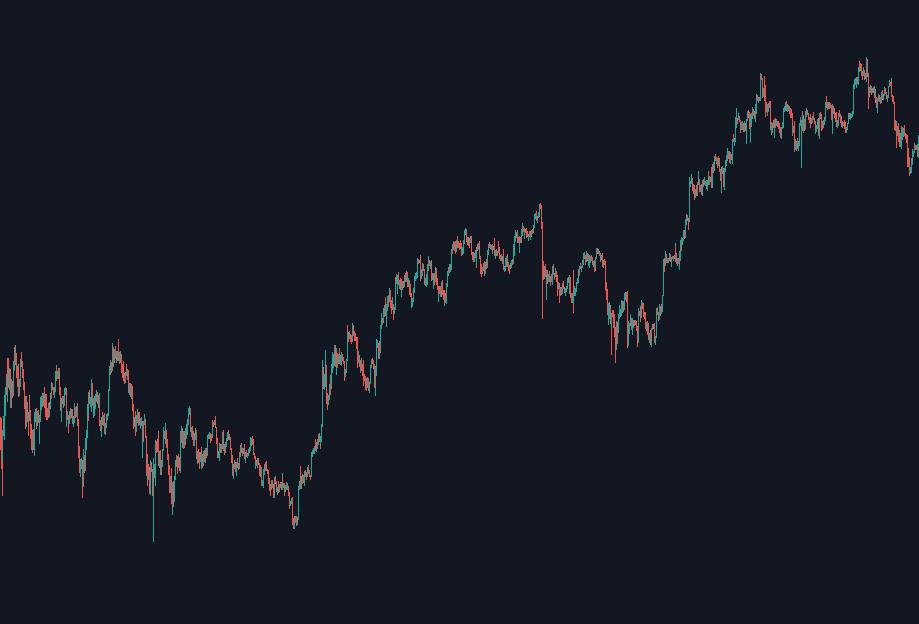

In [13]:
#Testing the model with saved images

model = tf.keras.models.load_model("./Chart Pattern Image Recognition/Chart-Recognition-64x3-CNN.model")


image = folder + ("chart4.jpg")
prediction = model.predict([prepare(image)])
print(prediction)  # will be a list in a list.
print(CATEGORIES[int(prediction[0][0])])

Image(filename=image) 

In [7]:
#Import live dataset

import yfinance

symbol = "ETH-USD"                       #Other symbols https://finance.yahoo.com/
ticker = yfinance.Ticker(symbol)
period = "5d"                          #Valid periods: 1d,5d,1mo,3mo,6mo,1y,2y,5y,10y,ytd,max Either Use period parameter or use start and end
interval = "1h"                        #Valid intervals: 1m,2m,5m,15m,30m,60m,90m,1h,1d,5d,1wk,1mo,3mo Intraday data cannot extend last 60 days


df = ticker.history(period = period, interval = interval)


df

,Open,High,Low,Close,Volume,Dividends,Stock Splits
2022-10-22 00:00:00+00:00,1299.902344,1302.265625,1299.002930,1301.606567,0,0,0
2022-10-22 01:00:00+00:00,1301.509155,1302.774658,1299.402466,1299.402466,0,0,0
2022-10-22 02:00:00+00:00,1299.323730,1300.185181,1296.770020,1297.035400,0,0,0
2022-10-22 03:00:00+00:00,1297.051147,1298.385376,1296.223755,1298.385376,0,0,0
2022-10-22 04:00:00+00:00,1298.435059,1299.303833,1297.481567,1297.552979,0,0,0
...,...,...,...,...,...,...,...
2022-10-26 16:00:00+00:00,1567.071655,1570.054199,1548.186279,1548.186279,60100608,0,0
2022-10-26 17:00:00+00:00,1548.466064,1557.735352,1546.236816,1557.719482,16531456,0,0
2022-10-26 18:00:00+00:00,1558.782104,1567.063354,1554.630371,1554.630371,80072704,0,0
2022-10-26 19:00:00+00:00,1554.329468,1554.402466,1550.209473,1552.392212,43626496,0,0


In [8]:
#Drop columns 

df.drop(["Volume", "Dividends", "Stock Splits" ], axis= 1, inplace=True)

df.tail(10)

,Open,High,Low,Close
2022-10-26 11:00:00+00:00,1537.073120,1541.317627,1528.386475,1529.247925
2022-10-26 12:00:00+00:00,1529.198486,1529.312988,1519.016724,1523.062256
2022-10-26 13:00:00+00:00,1523.256104,1535.319336,1517.051880,1533.768555
2022-10-26 14:00:00+00:00,1532.369995,1584.636719,1532.348022,1576.947388
2022-10-26 15:00:00+00:00,1576.324097,1578.141357,1565.273682,1567.198242
2022-10-26 16:00:00+00:00,1567.071655,1570.054199,1548.186279,1548.186279
2022-10-26 17:00:00+00:00,1548.466064,1557.735352,1546.236816,1557.719482
2022-10-26 18:00:00+00:00,1558.782104,1567.063354,1554.630371,1554.630371
2022-10-26 19:00:00+00:00,1554.329468,1554.402466,1550.209473,1552.392212
2022-10-26 19:13:00+00:00,1552.481079,1552.481079,1552.481079,1552.481079


1/1 [==============================] - 0s 39ms/step
[[1.]]
Bullish


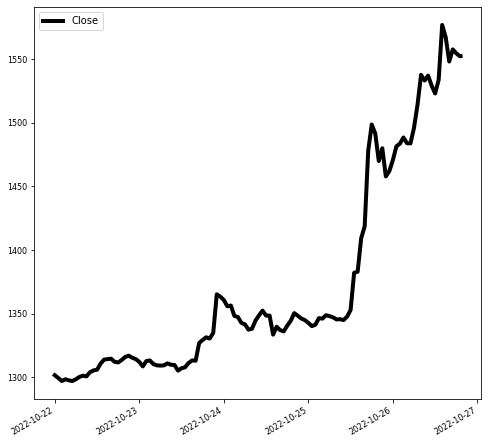

In [9]:
#Plot and save image

df[["Close"]].plot(grid = False
                                                        , figsize = (8, 8)
                                                        , linewidth = 4
                                                        , fontsize = 8
                                                        , color = ["black"])


plt.savefig("./Chart Pattern Image Recognition/liveimage.jpg", transparent=True)


#Predicting it 

live_image = ("liveimage.jpg")
live_prediction = model.predict([prepare(live_image)])
print(prediction)  # will be a list in a list.
print(CATEGORIES[int(live_prediction[0][0])])

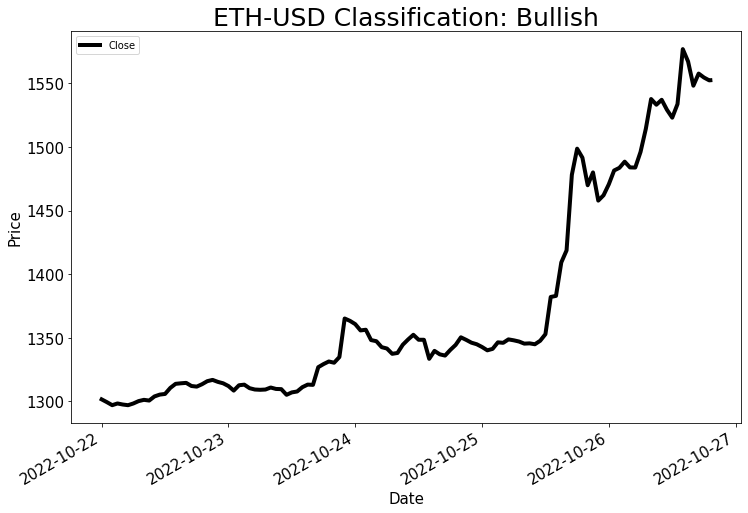

In [10]:
#Plotting prediction with a live chart 

df[["Close"]].plot(grid = False
                                                        , figsize = (12, 8)
                                                        , linewidth = 4
                                                        , fontsize = 15
                                                        , color = ["black"])
plt.xlabel("Date"
           , fontsize = 15);
plt.ylabel("Price"
           , fontsize = 15);
plt.title(symbol + " Classification: " + CATEGORIES[int(live_prediction[0][0])]
          , fontsize = 25);
plt.legend();

plt.savefig("./Chart Pattern Image Recognition/liveimage.jpg", transparent=True)

In [11]:
#Plotting a candlestick chart 

import plotly.graph_objects as go

fig = go.Figure()
fig.update_layout(
    title={
        'text': f"{symbol} - {period} Classification: {CATEGORIES[int(live_prediction[0][0])]}  ",
        'x':0.5,
        'xanchor': 'center'
    },
    xaxis_title="Date",
    yaxis_title="Price",
    xaxis_rangeslider_visible=False
)
fig.add_trace(
    go.Candlestick(
        x=df.index,
        open=df['Open'],
        high=df['High'],
        low=df['Low'],
        close=df['Close']
    )
)
fig.show()